In [ ]:
import json as js
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
bus = pd.read_json('./Yelp_dataset_business_clean.json', encoding='utf8')
#checkin = pd.read_json('./Yelp_dataset_checkin_clean.json', encoding='utf8')
review = pd.read_json('./Yelp_dataset_review_clean.json', encoding='utf8')

In [ ]:
busId = bus.business_id
cuisine = ['Chinese', 'Italian', 'Japanese', 'Korean', 'Mexican', 'American', 'Greek', 'French', 'Spanish', 'Turkish', 'Vietnamese',
          'Russian', 'German',  'Argentine', 'Thai', 'Middle Eastern', 'Brazilian', 'Pakistani', 
          'Indian','Filipino', 'Pizza', 'Caribbean', 'Hawaiian', 'Cuban', 'Mediterranean', 'Coffee & Tea','Breakfast & Brunch', 'Fast Food', 'Bars']

In [ ]:
colorDic = {'Indian': '	#EE6A50', 'Greek':'grey', 'Hawaiian': '#191970', 'French': '#f08800', 'Middle Eastern': '#8e09c8',
            'Vietnamese':'#00bd46', 'Korean': 'magenta', 'American': '#CD950C', 'Mexican': 'brown', 'Italian': 'yellow', 
           '(Non-Italian) Pizza': '#99009e', 'Chinese': 'red', 'Japanese': '#708344', 'Thai': '#00C5CD'}

In [10]:
import get_cuisine as gc
cuiDic = gc.get_cuisine(bus)

In [6]:
total = 0
covered = set()
for c in cuisine:
    for i in range(len(bus)):
        if i not in covered and c in bus.iloc[i].categories:
            covered.add(i)

In [7]:
cuiDic = dict()
covered.clear()

for c in cuisine:
    cuiDic[c] = list()
    for i in range(len(bus)):
        row = bus.iloc[i]
        if i not in covered and c in row.categories:
            cuiDic[c].append(row.business_id)
            covered.add(i)

In [11]:
cuiCount = dict()
for c in cuisine:
    cuiCount[c] = len(cuiDic[c])
    
cuiCount2 = cuiCount.copy()
del (cuiCount2['Fast Food'])
del (cuiCount2['Bars'])
del (cuiCount2['Coffee & Tea'])
del (cuiCount2['Breakfast & Brunch'])

sortCount = sorted(cuiCount.items(), key=lambda x: x[1], reverse=True)
countName = list()
counts = list()
for i in sortCount:
    if (i[0] == 'Taiwanese'):
        continue
    countName.append(i[0])
    counts.append(i[1])
    
sortCount2 = sorted(cuiCount2.items(), key=lambda x: x[1], reverse=True)
countName2 = list()
counts2 = list()
for i in sortCount2:
    countName2.append(i[0])
    counts2.append(i[1])
    
countName[4] = '(Non-Italian) Pizza'
countName2[3] = '(Non-Italian) Pizza'

Text(0, 0.5, '# of Restaurants')

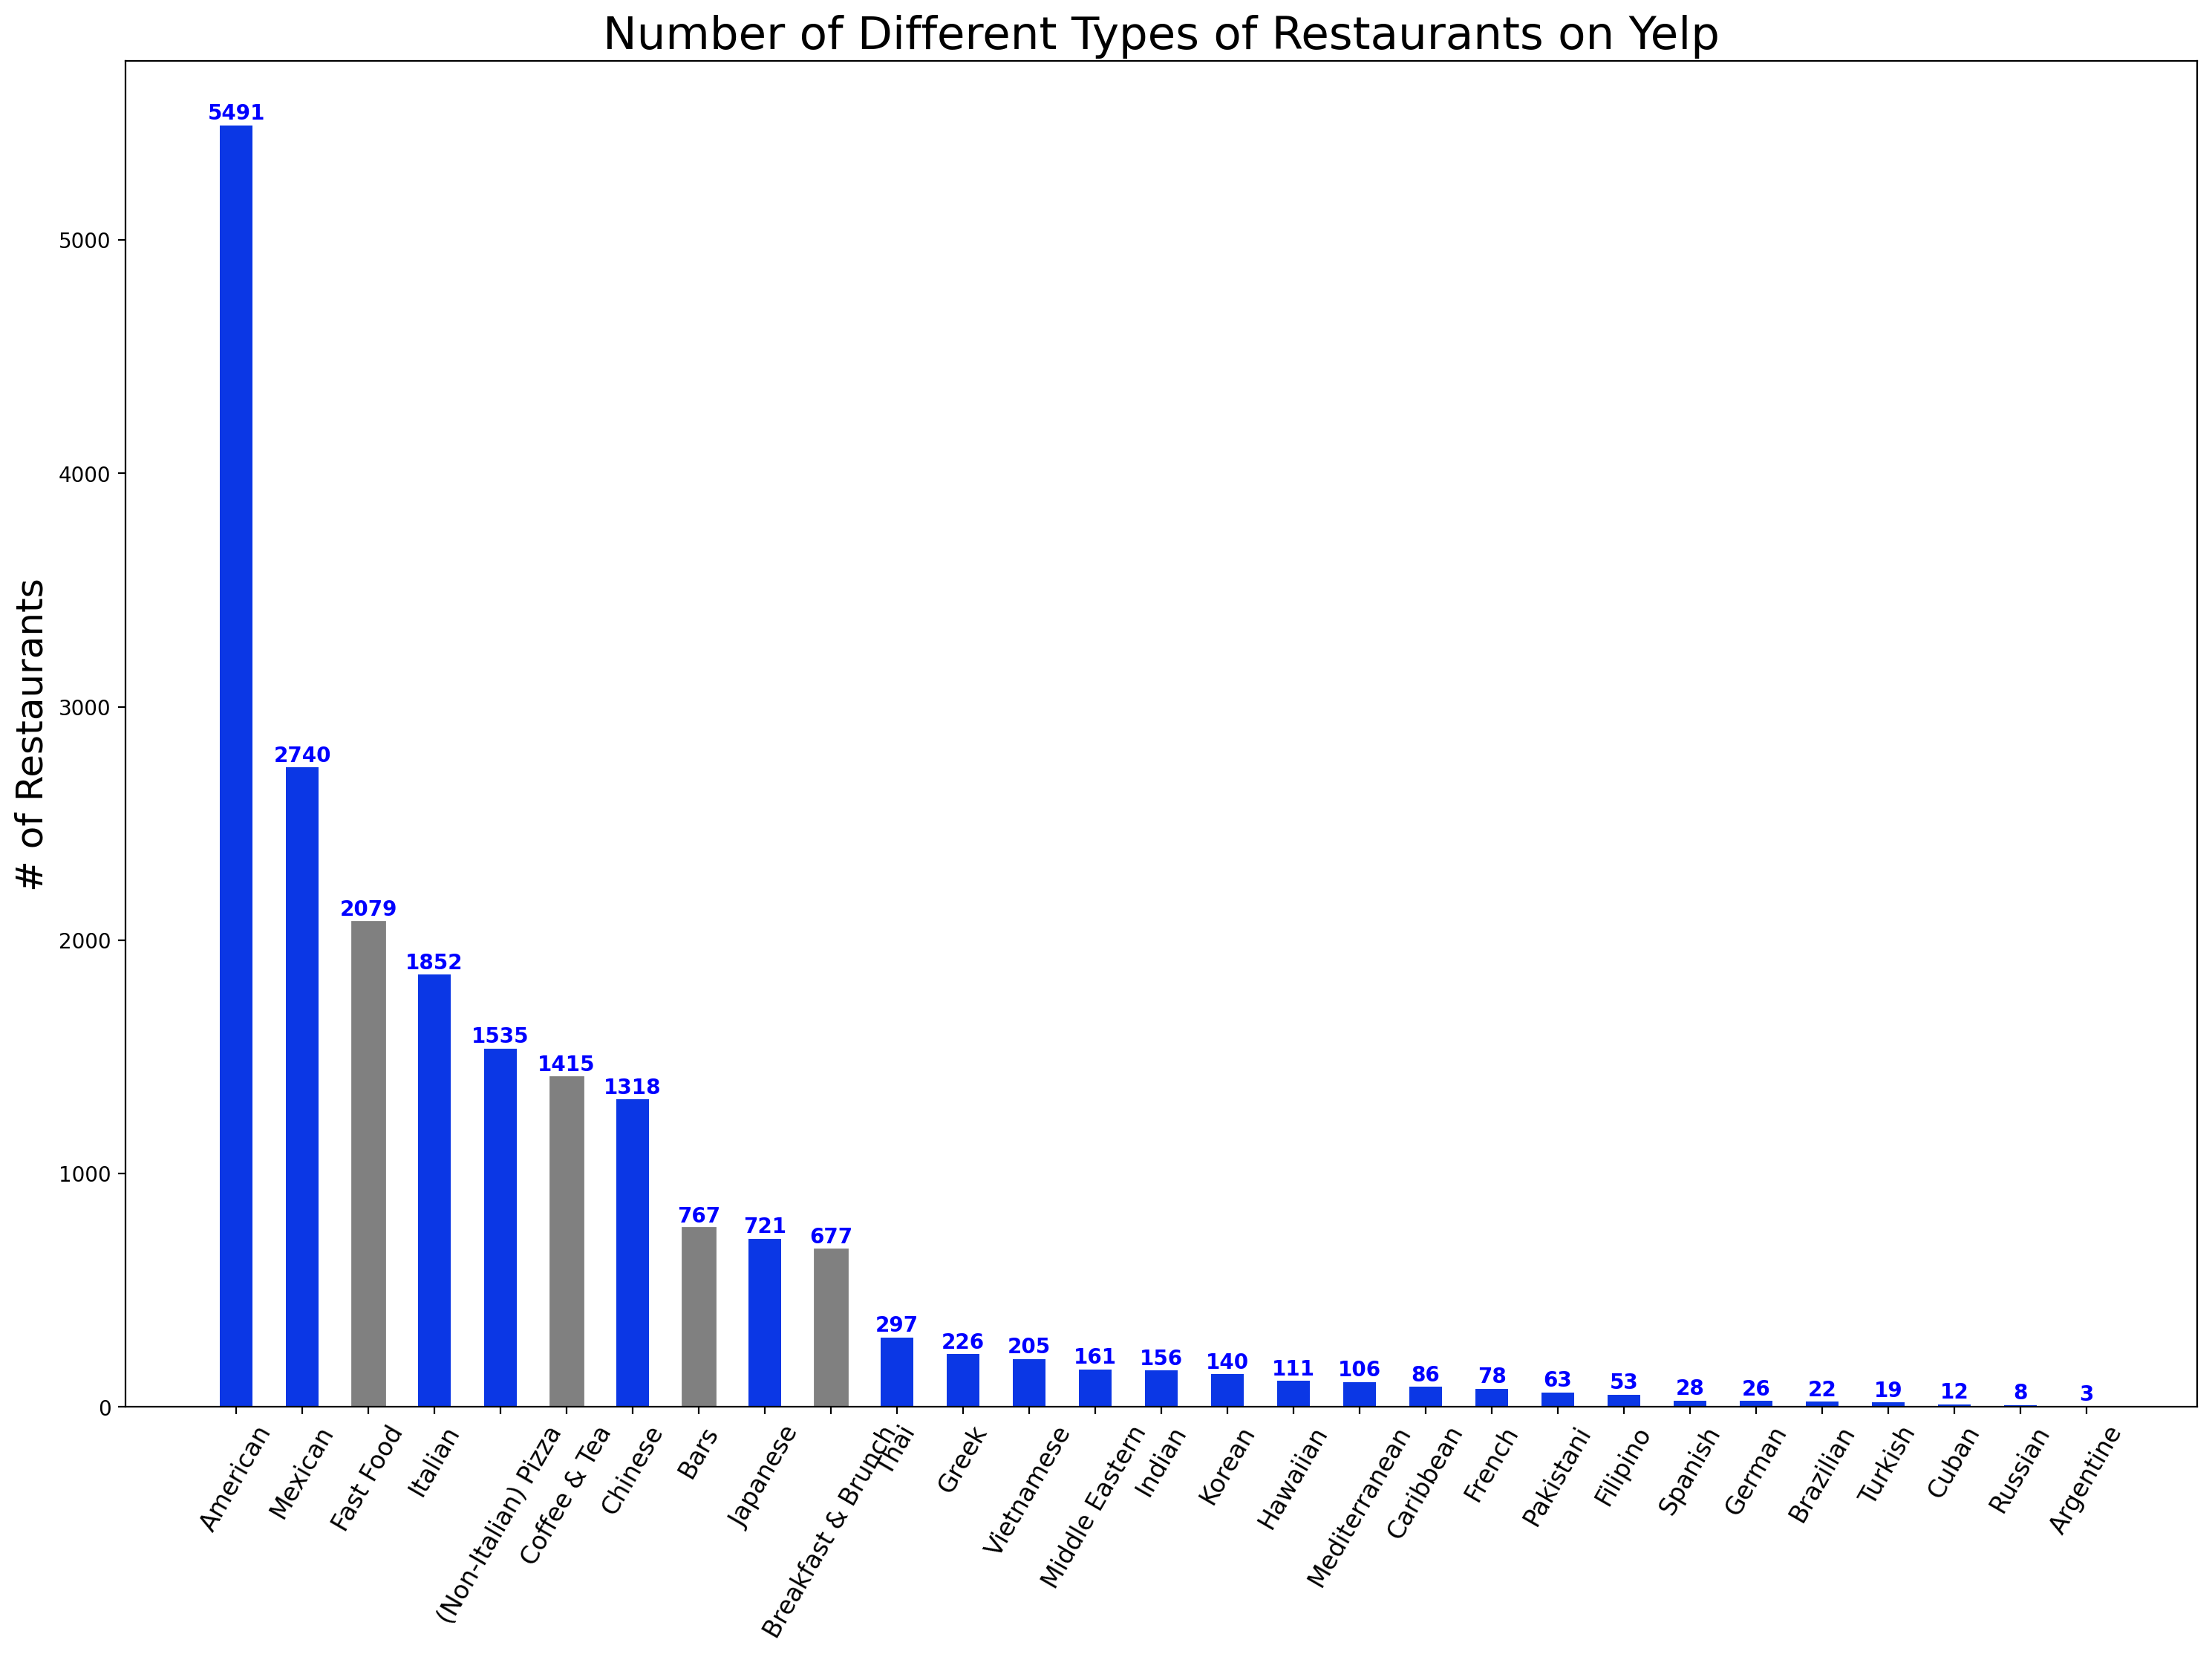

In [12]:
f, ax = plt.subplots(figsize=(18,12), dpi = 200)
barlist = plt.bar (countName, height=counts, width=0.5,color='#0b37e5')
for i, v in enumerate(counts):
    ax.text(i, v + 25, str(v), color='blue', fontweight='bold', ha='center')
plt.title('Number of Different Types of Restaurants on Yelp', fontsize=22)
barlist[2].set_color('grey')
barlist[7].set_color('grey')
barlist[5].set_color('grey')
barlist[9].set_color('grey')
plt.xticks(rotation=60, fontsize=12)
plt.ylabel('# of Restaurants', fontsize=18)

In [ ]:
# for c in cuisine:
#     print(c)
#     print(len(cuiDic[c]))
f, ax = plt.subplots(figsize=(18,9))
barlist = plt.bar (countName2[0:10], height=counts2[0:10], width=0.5,color='#0b37e5')
for i, v in enumerate(counts2[0:10]):
    ax.text(i - 0.12, v + 25, str(v), color='blue', fontweight='bold')
plt.title('Top 10 Trending Cuisines on Yelp (by number of restaurants)', fontsize=22)

plt.ylabel('# of Restaurants', fontsize=16)

f2, ax2 = plt.subplots(figsize=(10,10),dpi = 200)
colors2 = ['#0b37e5', '#20B2AA','orange', '#551A8B', '#CD0000', '#708344', '#00C5CD', 'grey', '#00bd46', '#8e09c8']

patches, texts, autotexts = plt.pie (x=counts2[0:10], labels=countName2[0:10], autopct='%1.2f%%', labeldistance=1.05, colors=colors2)
ax2.axis('equal')
for t in texts:
    t.set_fontsize(14)
for at in autotexts:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp (by # of restaurants)\n', fontsize=20)
f2.show()

In [ ]:
ciCount = dict()
for c in cuisine:
    ciCount[c] = 0

for i in range(len(checkin)):
    row = checkin.iloc[i]
    business = row.business_id
    count = len(row.date.split(', '))
    for c in cuisine:
        if business in cuiDic[c]:
            ciCount[c] = ciCount[c] + count

In [ ]:
del (ciCount['Fast Food'])
del (ciCount['Bars'])
del (ciCount['Coffee & Tea'])
del (ciCount['Breakfast & Brunch'])

In [ ]:
sortciCount = sorted(ciCount.items(), key=lambda x: x[1], reverse=True)
countName3 = list()
counts3 = list()
for i in sortciCount:
    countName3.append(i[0])
    counts3.append(i[1])
    
countName3[5] = '(Non-Italian) Pizza'

f3, ax3 = plt.subplots(figsize=(18,9))
plt.bar (countName3[0:10], height=counts3[0:10], width=0.5,color='#0b37e5')
for i, v in enumerate(counts3[0:10]):
    ax3.text(i, v + 20000, str(v), color='blue', fontweight='bold', ha='center')
plt.title('Top 10 Trending Cuisines on Yelp (by # of reviews)', fontsize=22)
plt.ylabel('# of Reviews', fontsize=16)

f4, ax4 = plt.subplots(figsize=(10,10), dpi=200)
colors3 = ['#0b37e5', '#20B2AA','orange', '#708344', '#CD0000', '#551A8B', '#00C5CD', '#00bd46', 
            '#FF1493', '#f08800']
patches2, texts2, autotexts2 = plt.pie (x=counts3[0:10], labels=countName3[0:10], autopct='%1.2f%%', labeldistance=1.05, colors = colors3)
ax4.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp (by # of reviews)', fontsize=20)
f4.show()

In [ ]:
# reviewCount = dict()
# for c in cuisine:
#     reviewCount[c] = 0

# for i in range(len(review)):
#     row = review.iloc[i]
#     business = row.business_id
#     for c in cuisine:
#         if business in cuiDic[c]:
#             reviewCount[c] = reviewCount[c] + 1
#     if i % 10000 == 0: print(i)

In [ ]:
# reviewCount = sorted(ciCount.items(), key=lambda x: x[1], reverse=True)
# countName4 = list()
# counts4 = list()
# for i in sortciCount:
#     countName4.append(i[0])
#     counts4.append(i[1])
    
# #countName3[5] = '(Non-Italian) Pizza'

# f5, ax5 = plt.subplots(figsize=(18,9))
# plt.bar (countName4[0:10], height=counts4[0:10], width=0.5)
# for i, v in enumerate(counts4[0:10]):
#     ax5.text(i - 0.12, v + 25, str(v), color='blue', fontweight='bold')
# plt.title('Top 10 Trending Restaurant on Yelp (by # of checkin)', fontsize=22)

# f6, ax6 = plt.subplots(figsize=(10,10))
# patches2, texts2, autotexts2 = plt.pie (x=counts3[0:10], labels=countName3[0:10], autopct='%1.2f%%', labeldistance=1.05)
# ax6.axis('equal')
# for t in texts2:
#     t.set_fontsize(14)
# for at in autotexts2:
#     at.set_fontsize(14)
#     at.set_color('white')
#     at.set_fontweight('bold')
# plt.title('Top 10 Trending Restaurant on Yelp (by # of checkin)', fontsize=20)
# f4.show()

In [ ]:
count2013 = dict()
count2015 = dict()
count2017 = dict()
count2019 = dict()

for c in cuisine:
    count2013[c] = 0
    count2019[c] = 0
    count2017[c] = 0
    count2015[c] = 0

for i in range(len(review)):
    row = review.iloc[i]
    business = row.business_id
    if (row.date.year not in [2013, 2015, 2017, 2019]):
        continue
    year = row.date.year
    for c in cuisine:
        if business in cuiDic[c]:
            if year == 2013:
                count2013[c] = count2013[c] + 1
            elif year == 2015:
                count2015[c] = count2015[c] + 1
            elif year == 2017:
                count2017[c] = count2017[c] + 1
            else:
                count2019[c] = count2019[c] + 1
    if i % 10000 == 0: print(i)

In [ ]:
del (count2013['Fast Food'])
del (count2013['Bars'])
del (count2013['Coffee & Tea'])
del (count2013['Breakfast & Brunch'])

del (count2015['Fast Food'])
del (count2015['Bars'])
del (count2015['Coffee & Tea'])
del (count2015['Breakfast & Brunch'])

del (count2017['Fast Food'])
del (count2017['Bars'])
del (count2017['Coffee & Tea'])
del (count2017['Breakfast & Brunch'])

del (count2019['Fast Food'])
del (count2019['Bars'])
del (count2019['Coffee & Tea'])
del (count2019['Breakfast & Brunch'])

In [ ]:
sorted13 = sorted(count2013.items(), key=lambda x: x[1], reverse=True)
countName4 = list()
counts4 = list()
for i in sorted13:
    countName4.append(i[0])
    counts4.append(i[1])
    
countName4[5] = '(Non-Italian) Pizza'

In [ ]:
# f6, ax6 = plt.subplots(figsize=(10,10))
# patches2, texts2, autotexts2 = plt.pie (x=counts4[0:10], labels=countName4[0:10], autopct='%1.2f%%', labeldistance=1.05)
# ax6.axis('equal')
# for t in texts2:
#     t.set_fontsize(14)
# for at in autotexts2:
#     at.set_fontsize(14)
#     at.set_color('white')
#     at.set_fontweight('bold')
# plt.title('Top 10 Trending Cuisines on Yelp in 2013 (by # of reviews)', fontsize=20)
# f6.show()

f6, ax6 = plt.subplots(figsize=(10,10), dpi=200)
colors4 = ['#CD0000', '#708344',  '#551A8B', '#00C5CD', '#f08800', '#00bd46', 'grey', '#FF1493', '#8e09c8', '#6495ED']
patches2, texts2, autotexts2 = plt.pie (x=counts4[3:13], labels=countName4[3:13], autopct='%1.2f%%', labeldistance=1.05, colors=colors4)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2013 (by # of reviews)', fontsize=20)
plt.suptitle('(Excluding American, Mexican and Italian)', x=0.5, y=0.88, fontsize=12)
f6.show()

In [ ]:
sorted15 = sorted(count2015.items(), key=lambda x: x[1], reverse=True)
countName4 = list()
counts4 = list()
for i in sorted15:
    countName4.append(i[0])
    counts4.append(i[1])
    
countName4[5] = '(Non-Italian) Pizza'

# f5, ax5 = plt.subplots(figsize=(18,9))
# plt.bar (countName4[0:10], height=counts4[0:10], width=0.5, color='#1b53f3')
# for i, v in enumerate(counts4[0:10]):
#     ax5.text(i - 0.18, v + 500, str(v), color='blue', fontweight='bold')
# plt.title('Top 10 Trending Restaurant on Yelp in 2015 (by # of reviews)', fontsize=22)

In [ ]:
# f6, ax6 = plt.subplots(figsize=(10,10))
# patches2, texts2, autotexts2 = plt.pie (x=counts4[0:10], labels=countName4[0:10], autopct='%1.2f%%', labeldistance=1.05)
# ax6.axis('equal')
# for t in texts2:
#     t.set_fontsize(14)
# for at in autotexts2:
#     at.set_fontsize(14)
#     at.set_color('white')
#     at.set_fontweight('bold')
# plt.title('Top 10 Trending Cuisines on Yelp in 2015 (by # of reviews)', fontsize=20)
# f6.show()

f6, ax6 = plt.subplots(figsize=(10,10), dpi=200)
colors5 = [ '#708344', '#CD0000','#551A8B', '#00C5CD',  '#00bd46','#f08800', 'grey', '#FF1493','#6495ED',  '#8e09c8', ]
patches2, texts2, autotexts2 = plt.pie (x=counts4[3:13], labels=countName4[3:13], autopct='%1.2f%%', labeldistance=1.05, colors = colors5)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2015 (by # of reviews)', fontsize=20)
plt.suptitle('(Excluding American, Mexican and Italian)', x=0.5, y=0.88, fontsize=12)
f6.show()

In [ ]:
sorted17 = sorted(count2017.items(), key=lambda x: x[1], reverse=True)
countName4 = list()
counts4 = list()
for i in sorted17:
    countName4.append(i[0])
    counts4.append(i[1])
    
countName4[5] = '(Non-Italian) Pizza'

In [ ]:
f6, ax6 = plt.subplots(figsize=(10,10), dpi=200)
colors6 = [ '#708344', '#CD0000','#551A8B', '#00C5CD', '#FF1493', '#00bd46','grey', '#f08800', '#6495ED',  '#8e09c8']
patches2, texts2, autotexts2 = plt.pie (x=counts4[3:13], labels=countName4[3:13], autopct='%1.2f%%', labeldistance=1.05, colors=colors6)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2017 (by # of reviews)', fontsize=20)
plt.suptitle('(Excluding American, Mexican and Italian)', x=0.5, y=0.88, fontsize=12)
f6.show()

In [ ]:
sorted19 = sorted(count2019.items(), key=lambda x: x[1], reverse=True)
countName4 = list()
counts4 = list()
for i in sorted19:
    countName4.append(i[0])
    counts4.append(i[1])
    
countName4[5] = '(Non-Italian) Pizza'

In [ ]:
f6, ax6 = plt.subplots(figsize=(10,10), dpi=200)
colors7 = [ '#708344', '#CD0000','#551A8B', '#00C5CD', '#FF1493', '#00bd46','grey', '#6495ED', '#f08800',  '#191970']
patches2, texts2, autotexts2 = plt.pie (x=counts4[3:13], labels=countName4[3:13], autopct='%1.2f%%', labeldistance=1.05, colors=colors7)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2019 (by # of reviews)', fontsize=20)
plt.suptitle('(Excluding American, Mexican and Italian)', x=0.5, y=0.88, fontsize=12)
f6.show()

In [ ]:
cuisine2 = ['Chinese', 'Italian', 'Japanese', 'Korean', 'Mexican', 'American', 'Greek', 'French', 'Spanish', 'Turkish', 'Vietnamese',
          'Taiwanese', 'Russian', 'German',  'Argentine', 'Thai', 'Middle Eastern', 'Brazilian', 'Pakistani', 
          'Indian','Filipino', 'Pizza', 'Caribbean', 'Hawaiian', 'Cuban', 'Mediterranean']

countMonth = dict()

for i in range(1, 13):
    countMonth[i] = dict()
    for c in cuisine:
        countMonth[i][c] = 0

for i in range(len(review)):
    row = review.iloc[i]
    business = row.business_id
    if (row.date.year != 2018):
        continue
    month = row.date.month
    for c in cuisine2:
        if business in cuiDic[c]:
            countMonth[month][c] = countMonth[month][c] + 1
    if i % 10000 == 0: print(i)

In [ ]:
countName5 = list()
counts5 = list()


# f7, ax7 = plt.subplots(figsize=(25,22), dpi=200)
# ticks = list()
# bars = list()
for i in range(1, 13):
    monCount = countMonth[i]
    sortedMon = sorted(monCount.items(), key=lambda x: x[1], reverse=True)
    countName5 = list()
    counts5 = list()
    for j in sortedMon:
        if (j[0] == 'Pizza'):
            countName5.append('(Non-italian) Pizza')
        else:
            countName5.append(j[0])
        counts5.append(j[1])
    print(countName5[8:13])

#     b0 = ax7.bar(i, counts5[9], width = 0.5, color=colorDic[countName5[9]])
#     bars.append(b0)
#     prevSum = counts5[9]
#     for j in range(10, 14):
#         b = ax7.bar(i, counts5[j], width = 0.5, bottom = prevSum, color=colorDic[countName5[j]])
#         bars.append(b)
#         prevSum = prevSum + counts5[j]
# plt.xticks(range(1, 13), fontsize=14)
# plt.xlabel("Month in 2019", fontsize=20)
# plt.ylabel("# of Reviews", fontsize=20)
# bars[5] = bars[14]
# plt.legend(bars[0:6],['Greek', 'French', 'Indian', 'Middle Eastern', 'Hawaiian'], fontsize = 18)
# plt.title('Top 9th to 13th Trending Cuisines in 2019 (by number of reviews)', fontsize=30)

In [ ]:
top9_13 = ['Vietnamese', 'Greek', 'Indian', 'French', 'Hawaiian', 'Middle Eastern', 'Korean']
colorDic = {'Indian': 'blue', 'Greek':'grey', 'Hawaiian': 'green', 'French': '#f08800', 'Middle Eastern': '#8e09c8',
            'Vietnamese':'red', 'Korean': 'magenta'}
cui_mon_count = dict()
for c in top9_13:
    cui_mon_count[c] = list()
    for i in range(1,13):
        cui_mon_count[c].append(countMonth[i][c])

In [ ]:
f7, ax7 = plt.subplots(figsize=(25,22), dpi=200)
# plt.bar(range(1, 13), cui_mon_count['Greek'], width = 0.5, color=colorDic['Greek'])
# bartop = list(cui_mon_count['Greek'])
for i in range(0, 7):
#     print(top9_13[i])
#     plt.bar(range(1, 13), cui_mon_count[top9_13[i]], bottom = bartop, width = 0.5, color=colorDic[top9_13[i]])
#     for j in range(0, 12):
#         bartop[j] = bartop[j] + cui_mon_count[top9_13[i]][j]
    plt.plot(range(1, 12), cui_mon_count[top9_13[i]][0:11], color=colorDic[top9_13[i]])
        

In [ ]:
cui_mon_count